In [102]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

# Image Analytics

After going through these materials, you will be able to use OpenCV or other libraries for:

- image preprocessing,
- feature extraction,
- image classification.

First we import the OpenCV, Tensorflow and other libraries:

In [103]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
import requests
import mahotas

## Image preprocessing 

We approach image preprocessing for two reasons:

- Input standardization/complexity reduction,
- Suppressing undesired distortions and enhancing desirable features.

We will show image preprocessing techniques in the picture showing Prague Castle:

129092

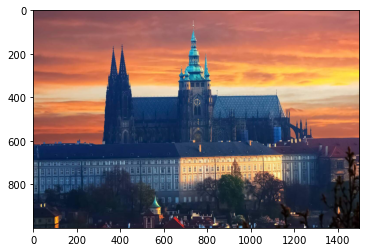

In [104]:
response = requests.get("https://www.amazingczechia.com/wp-content/uploads/2017/05/prague-castle-01.jpg")

file = open("prague_castle.png", "wb")
file.write(response.content)
file.close()

img = cv.imread('prague_castle.png')

# Open-CV store images in BGR but plt expect RGB
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

Dimensions of the image:

In [72]:
img.shape

(1000, 1500, 3)

### Input standardization/complexity reduction


#### Resize the image

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f49ff97820>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f4a88461f0>,
 Text(0.5, 1.0, 'Resized'))

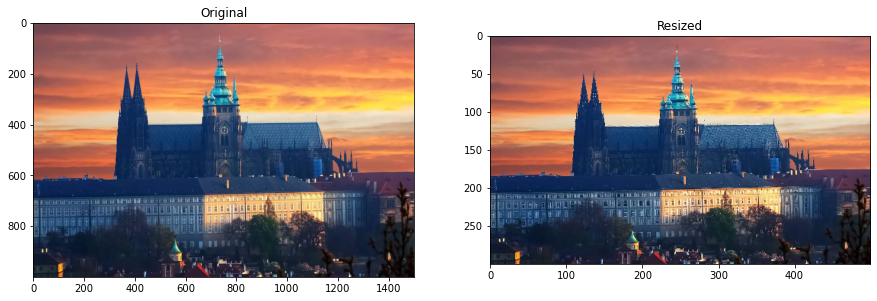

In [73]:
resized_img = cv.resize(img, dsize = (500,300),)

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)), plt.title('Resized')
plt.show()

Reduced dimensionality:

In [74]:
img.shape
resized_img.shape

(1000, 1500, 3)

(300, 500, 3)

#### Convert color images to grayscale 

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f4a87d4580>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f49867ba30>,
 Text(0.5, 1.0, 'Grayscaled'))

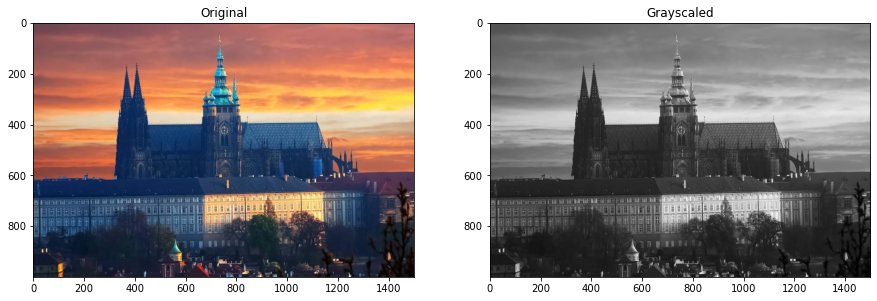

In [105]:
grayscaled_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(grayscaled_img, cv.COLOR_BGR2RGB)), plt.title('Grayscaled')
plt.show()

Reduced dimensionality:

In [76]:
img.shape
grayscaled_img.shape

(1000, 1500, 3)

(1000, 1500)

### Suppressing undesired distortions and enhancing desirable features

#### Reduce the noise
Gaussian blur technique with a kernel of 5x5 size:

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f4985e4550>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f49b00d250>,
 Text(0.5, 1.0, 'Blurred'))

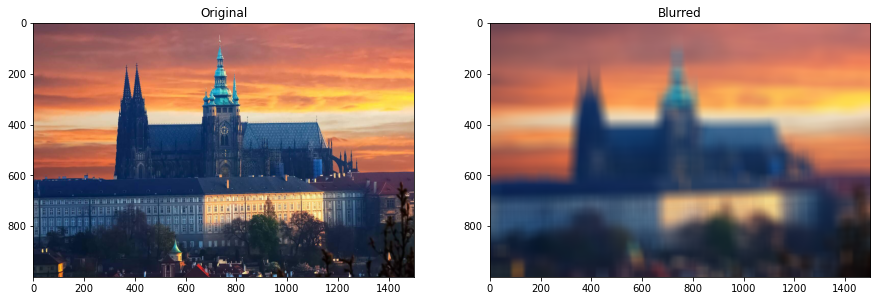

In [107]:
blurred_img = cv.blur(img, (50, 50))

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), plt.title('Blurred')
plt.show()

#### Segmentation

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f498454940>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f498571040>,
 Text(0.5, 1.0, 'Segmented'))

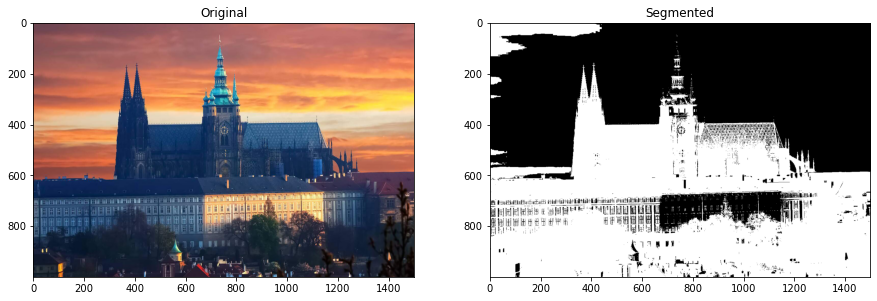

In [108]:
ret, thresh = cv.threshold(grayscaled_img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB)), plt.title('Segmented')
plt.show()

#### Pixel brightness transformations

Gamma Correction:

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f49851bc10>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f49ac744f0>,
 Text(0.5, 1.0, 'Corrected'))

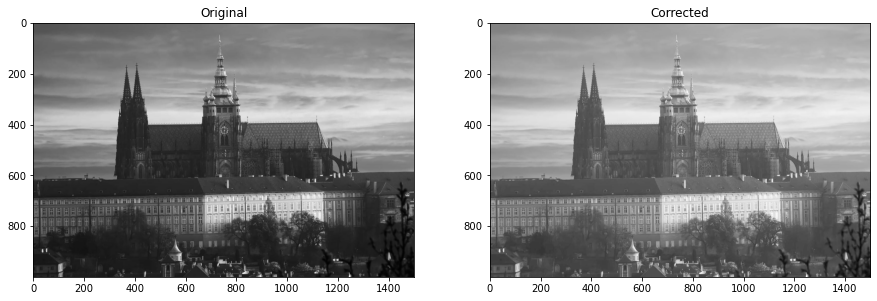

In [109]:
normalised_img = grayscaled_img.astype(np.float32) / 255
    
gamma = 0.6
corrected_image = np.power(normalised_img, gamma)

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(normalised_img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB)), plt.title('Corrected')
plt.show()

Histogram equalization:

<Figure size 1080x720 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f4983adb20>,
 Text(0.5, 1.0, 'Original'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1f4985c7130>,
 Text(0.5, 1.0, 'Equalized'))

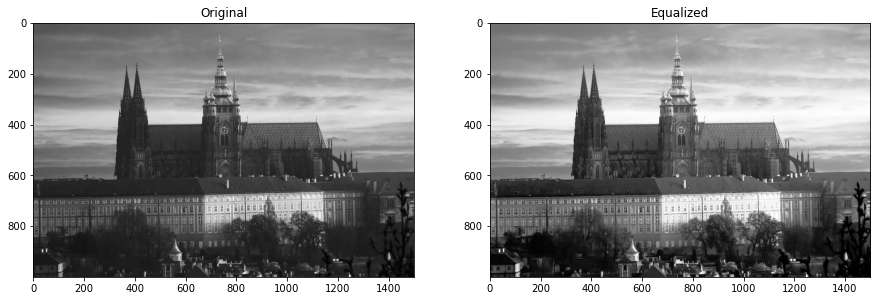

In [80]:
equalized_img = cv.equalizeHist(grayscaled_img)

plt.figure(figsize = (15,10))
plt.subplot(121), plt.imshow(cv.cvtColor(grayscaled_img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB)), plt.title('Equalized')
plt.show()

## Feature extraction

The purpose of feature extraction is to obtain a structured representation of images in the form of vectors.

### Global Feature descriptors 


Global features descriptors are able to describe images as a whole. Specifically, they are able to describe the image in terms of:

- colors
- contour,
- shape,
- texture,

in numerical form.

#### Shape feature descriptor (Hu Moments)


In [110]:
feature_vector_shape = cv.HuMoments(cv.moments(grayscaled_img)).flatten()

feature_vector_shape.shape
feature_vector_shape

(7,)

array([ 1.66481417e-03,  6.73152658e-07,  6.36917418e-11,  6.29355614e-11,
       -2.36326539e-21,  3.71625595e-14,  3.20812825e-21])

#### Color feature descriptor (Color Histogram)

In [111]:
img_hvs = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# compute the color histogram
hist = cv.calcHist([img_hvs], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
# normalize the histogram
hist = cv.normalize(hist, hist)
# return the histogram
feature_vector_color = hist.flatten()

feature_vector_color.shape
#feature_vector_color


(512,)

#### Texture feature descriptor (Haralick Textures)

In [112]:
feature_vector_texture = mahotas.features.haralick(grayscaled_img).mean(axis=0)

feature_vector_texture.shape
feature_vector_texture

(13,)

array([ 1.56224296e-03,  2.27996787e+02,  9.68035067e-01,  3.56631122e+03,
        5.12342653e-01,  2.04573053e+02,  1.40372481e+04,  8.49462200e+00,
        1.13700063e+01,  8.07937451e-04,  3.43530371e+00, -4.95631930e-01,
        9.99649025e-01])

#### Structured vector representation of image

We obtain a structured representation of the image together with all three feature vectors.

In [84]:
vector_representation = np.hstack([feature_vector_shape, feature_vector_color, feature_vector_texture])

vector_representation.shape

(532,)

### Local features descriptors

Local feature descriptors extracts key points in the image.

#### Scale-invariant feature transform (SIFT)

In [113]:
sift = cv.SIFT_create()

# extract key points (features) and their feature vectors
key_points, feature_vectors = sift.detectAndCompute(img, None)

Number of extracted key points (features):

In [114]:
len(key_points)

4018

Size feature vectors:

In [115]:
sift.descriptorSize()
feature_vectors.shape

128

(4018, 128)

Display of extracted key points in the image:

<Figure size 1080x720 with 0 Axes>

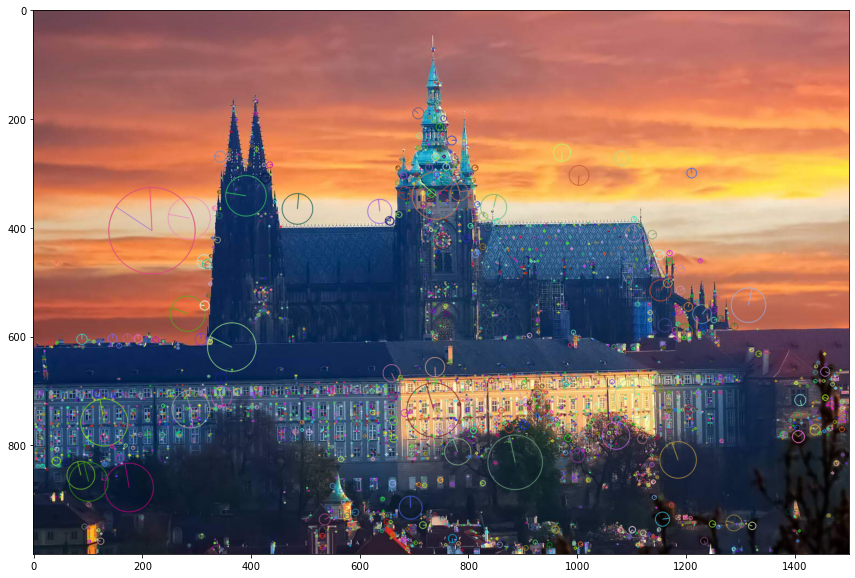

In [116]:
img_key_points = cv.drawKeypoints(img, key_points, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (15,10))
plt.imshow(cv.cvtColor(img_key_points, cv.COLOR_BGR2RGB))
plt.show()

#### BRISK

In [117]:
brisk = cv.BRISK_create(180)

# extract key points (features) and their feature vectors
key_points, feature_vectors = brisk.detectAndCompute(img, None)

Number of extracted key points (features):

In [118]:
len(key_points)
feature_vectors.shape

7

(7, 64)

Size feature vectors:

In [119]:
brisk.descriptorSize()
feature_vectors.shape

64

(7, 64)

Display of extracted key points in the image:

<Figure size 1080x720 with 0 Axes>

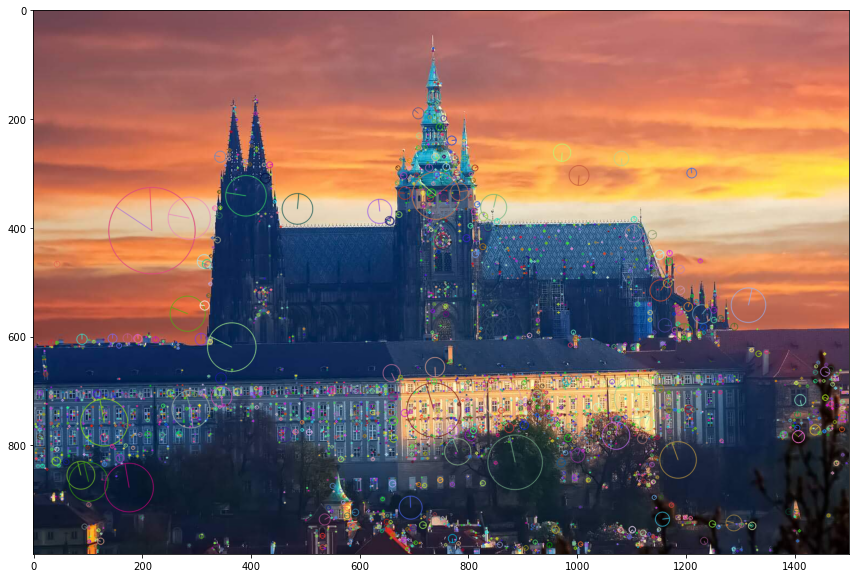

In [120]:
img_key_points = cv.drawKeypoints(img, key_points, img,flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

plt.figure(figsize = (15,10))
plt.imshow(cv.cvtColor(img_key_points, cv.COLOR_BGR2RGB))
plt.show()

## Image Classification

## Data

For the purposes of this notebook, we will work with the MNIST dataset containing 70,000 thousand handwritten numbers of the Greek alphabet.

Download data:

In [121]:
import seaborn as sns
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

### Basic data understanding and visualisation

In [26]:
x_train.shape
y_train.shape

(60000, 28, 28)

(60000,)

In [27]:
x_test.shape
y_test.shape

(10000, 28, 28)

(10000,)

<AxesSubplot:ylabel='Count'>

<AxesSubplot:ylabel='Count'>

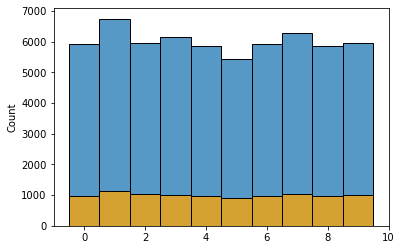

In [28]:
sns.histplot(data=y_train, discrete=True)
sns.histplot(data=y_test, discrete=True, color='orange')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

<AxesSubplot:>

([], [])

([], [])

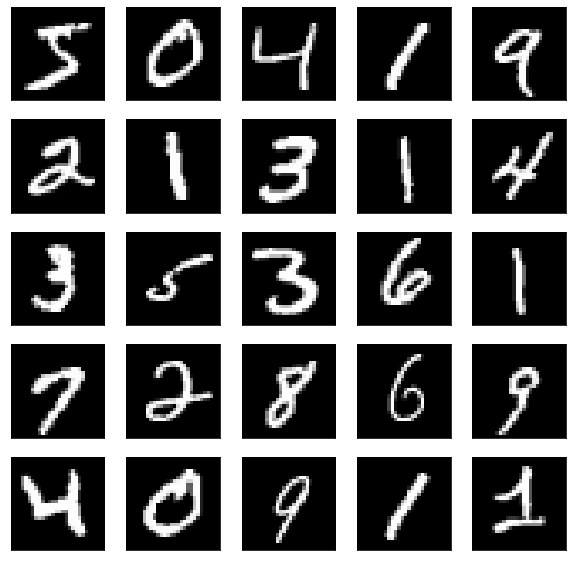

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv.cvtColor(x_train[i], cv.COLOR_BGR2RGB))
plt.show()

### Convolutional Neural Network (CNN)
We are now training the simple CNN model for classification purposes.


Before modeling with CNN, it is necessary to normalize the data and perform reshaping:

- CNN expects images to be rescaled between 0 and 1
- Tensorflow expects a certain input shape (number of images, image x_dim, image y_dim, number of channels)

In [29]:
from tensorflow.keras import models, layers

ModuleNotFoundError: No module named 'tensorflow'

In [31]:
np.min(x_train[0])
np.max(x_train[0])

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

np.min(x_train[0])
np.max(x_train[0])

x_train.shape
x_test.shape

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape
x_test.shape

#x_train =  x_train.reshape([x_train.shape[0], x_train.shape[1], x_train.shape[2], 1])
#x_test =  x_test.reshape([x_test.shape[0], x_test.shape[1], x_test.shape[2], 1])

0

255

0.0

1.0

(60000, 28, 28)

(10000, 28, 28)

(60000, 28, 28, 1)

(10000, 28, 28, 1)

Now we can create the architecture of a simple CNN model:
- The first layer processes the input image with the input shape (28, 28, 1) and returns a 3D tensor (feature maps) as each other Conv2D and MaxPooling2D.
- MaxPooling2D layers reduce the complexity of extracted feature maps.
-  Flatten layer unroll the 3D tensor to 1D vector (vector representation of images).
-  Dense layers on top ensure classification. Final Dense layer has 10 outputs, which is the same number as the number of categories.

In [32]:
model = models.Sequential()
# feature (maps) extraction
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# create 1D vector representation
model.add(layers.Flatten())

# classification 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

Compilation and training of the CNN model:

- *Adam*: optimization algorithm that is used to update network weights iterative based in training data.
- *sparse_categorical_crossentropy*: computes the crossentropy loss between the labels and predictions (two or more label classes).

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

training_validation = model.fit(x = x_train,y = y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4719 - accuracy: 0.8510 - val_loss: 0.0941 - val_accuracy: 0.9717
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.0528 - val_accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0551 - val_accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0424 - val_accuracy: 0.9874


Display of the training and validation process:

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

(0.98, 1.0)

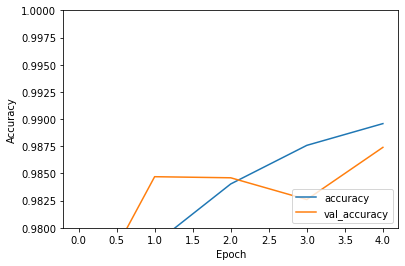

In [34]:
plt.plot(training_validation.history['accuracy'], label='accuracy')
plt.plot(training_validation.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.98, 1])
plt.legend(loc='lower right')

Use of trained model on test data:

In [35]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.04242297634482384
Test accuracy: 0.9873999953269958


Our basic model CNN has achieved a test accuracy of over 98%!